# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Количество парков и водоёмов также заполняется без участия пользователя. 

**Цель проекта:** Определить параметры рыночной стоимости обьектов недвижимости

**Описание данных**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**Основные этапы проекта:**

- Изучить данные на наличие пропусков, соответствуют ли типы данных колонок содержащимся в них данным
- Выявить количество пропущенных значений
- Заполнить пропуски
- Сделать срезы данных для более подробного анализа
- Выявить факторы, влияющие на цену квартиры
- Провести исследование обработанных данных
- Составить вывод

## Откройте файл с данными и изучите общую информацию. 

### Импорт библиотеки pandas и считывание данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

### Изучение инфомации о датафрейме

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#переименуем столбец в сооответствии с правилом snake_case
data = data.rename(columns = {'cityCenters_nearest': 'city_centres_nearest'})
#выведем общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Построение гистограмм для всех числовых столбцов таблицы

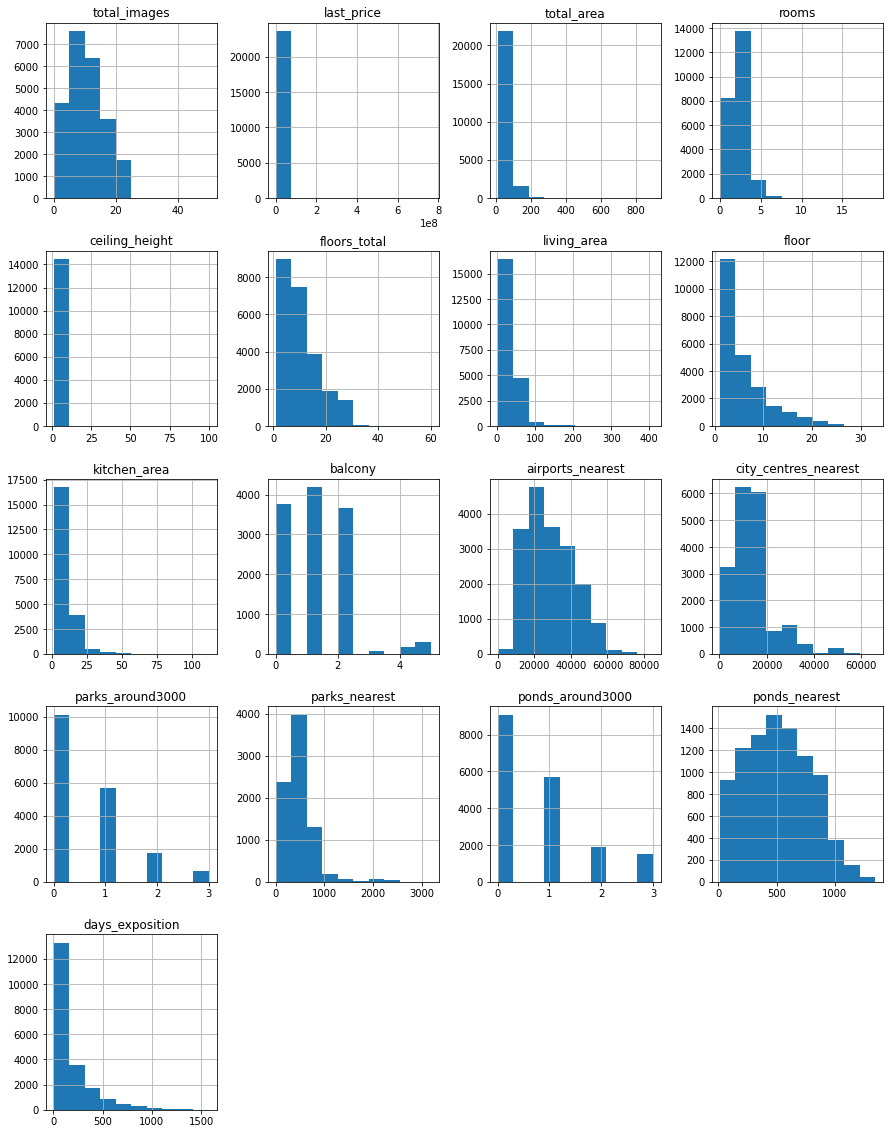

In [4]:
data.hist(figsize = (15, 20));

Аномалии прослеживаются во многих графиках с пиком значений около нуля. Чтобы понять в чем дело, вызовем метод describe()

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Вывод** 

Исследовав таблицу, можно выявить следующие аномалии:

- максимальная высота потолка 100 метров, а минимальная составляет 1 метр
- расстояние до ближайшего парка 1 метр
- минимальный размер кухни 1,3 кв.метра
- минимальный размер жилой площади 2 кв.метра
- минимальное расстояние до ближайшего аэропорта

## Предобработка данных

### Подсчет числа пропусков

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centres_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Возможные причины пропусков в каждом столбце:


Заполнялось людьми:

- ceiling_height 
- floors_total 
- living_area
- is_apartment - в случае указания вида жилья люди могли не видеть разницы между обычной квартирой и апартаментами, поэтому просто не указывали данный параметр.
- kitchen_area
- balcony - можно предположить, что в данном случае у квартир нет балконов
- locality_name
- days_exposition

При заполнении данных людьми человеческий фактор играет большую роль, т.к. данные могли просто не указать или забыть их внести.

Заполнялось компьютером:

- airports_nearest
- city_centres_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest

При заполнении числа парков и прудов собирались данные в определенном диапазоне, поэтому вне диапазона они не учитывались - обьясняет пропуски в числе учтенных парков и прудов. 

Общее число пробелов в расстоянии до прудов и парков превышают значения их числа почти в 3 раза, что может означать сбой при сборе информации.

Расстояние до ближайшего аэропорта - видимо аэропорт находится на расстоянии, превышающий максимальное в таблице

Расстояние до центра - квартира находится далеко от центра.

Но расстояния до квартиры и ближайшего аэропорта не имеют огранчений, как расстояния до прудов и парков, поэтому нельзя исключать возможность сбоя при заполнении.

### Устранение пропусков

Значение NaN можно заменить на 0 в следующих столбцах: balcony, parks_around3000, ponds_around3000 и days_exposition т.к. в радиусе 3 км могут отсутствовать пруды и парки.


In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)
data[['balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']].isna().sum()

balcony             0
parks_around3000    0
ponds_around3000    0
days_exposition     0
dtype: int64

Устраним пропуски в 'locality_name' с помощью метода dropna(), т.к. восстановить название населенного пункта не получится. По тому же принципу удалим пропуски в 'floors_total'.

In [8]:
data = data.dropna(subset = ['locality_name', 'floors_total']).reset_index(drop = True)
data[['locality_name', 'floors_total']].isna().sum()

locality_name    0
floors_total     0
dtype: int64

'parks_nearest' и 'ponds_nearest' не будем трогать, т.к. причина отсутсвия данных непонятна

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centres_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

### Изменение типов данных

Изменить типы данных требуется в следующих столбцах:

- в челочисленный тип(int): balcony, days_exposition, ponds_around3000, parks_around3000, floors_total и days_exposition


- изменить формат даты: first_day_exposition


- перевести в булевый тип: is_apartment

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [11]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

In [12]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Для проверки выведем общую информацию о таблице

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

### Поиск дубликатов

##### Поиск явных дубликатов

In [14]:
#поиск явных дубликатов
data.duplicated().sum()

0

##### Поиск неявных дубликатов

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Что нужно исправить для избавления от неявных дубликатов:
- заменить ё на е
- "поселок городского типа", "городской поселок" заменить на "поселок"

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace(['городской поселок', 'поселок городского типа'], 'поселок', regex = True)
#выведем уникальные значения в столбце после замены
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [17]:
#при анализе результата была выявлена ещё одна пара дубликатов
data['locality_name'] = data['locality_name'].str.replace('село Никольское', 'Никольское', regex = True)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

## Посчитайте и добавьте в таблицу новые столбцы

* цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

### Добавление цены одного квадратного метра

In [18]:
data['price_square_m'] = round(data['last_price']/data['total_area'], 2)
data['price_square_m'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_square_m, dtype: float64

### Добавление столбца с днем недели

In [19]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data['week_day'].head()

0    3
1    1
2    3
3    4
4    1
Name: week_day, dtype: int64

### Добавление месяца публикации

In [20]:
data['month'] = data['first_day_exposition'].dt.month
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

### Добавление столбца с указанием года публикации обьявлений

In [21]:
data['year'] = data['first_day_exposition'].dt.year
data['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

### Добавление типа этажа квартиры

Распределим этажи по категориям.

In [22]:
#создаем функцию для присвоения категории по условиям
def floor_category(item):
    floor = item['floor']
    max_floor = item['floors_total']
    if floor == 1:
        return 'первый'
    if floor == max_floor:
        return 'последний'
    else:
        return 'другой'

In [23]:
#заполняем столбец с помощью функции
data['category_floor'] = data.apply(floor_category, axis = 1)
#проверка заполнения
data['category_floor'].value_counts()

другой       17326
последний     3330
первый        2909
Name: category_floor, dtype: int64

### Перевод расстояния до центра города в киллометры

In [24]:
data['city_centres_nearest_km'] = round(data['city_centres_nearest']/1000)
data['city_centres_nearest_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centres_nearest_km, dtype: float64

## Проведите исследовательский анализ данных

### Изучение следующих параметров

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка

Сделаем новый датафрейм с интересующими нас столбцами, потому как такие столбцы как total_images, studio, is_apartment, balcony, open_plan, airports_nearest, parks_around3000, ponds_around3000, ponds_nearest не учавствуют в дальнейшем анализе.

In [25]:
new_data = data[['last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area',
                'floor', 'kitchen_area', 'locality_name', 'city_centres_nearest', 'parks_nearest', 'days_exposition', 
                'price_square_m', 'week_day', 'month', 'year', 'category_floor', 'city_centres_nearest_km']]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   last_price               23565 non-null  float64       
 1   total_area               23565 non-null  float64       
 2   first_day_exposition     23565 non-null  datetime64[ns]
 3   rooms                    23565 non-null  int64         
 4   ceiling_height           14481 non-null  float64       
 5   floors_total             23565 non-null  int64         
 6   living_area              21700 non-null  float64       
 7   floor                    23565 non-null  int64         
 8   kitchen_area             21343 non-null  float64       
 9   locality_name            23565 non-null  object        
 10  city_centres_nearest     18064 non-null  float64       
 11  parks_nearest            8030 non-null   float64       
 12  days_exposition          23565 n

##### Исследование данных одбщей площади

AxesSubplot(0.125,0.125;0.775x0.755)
count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


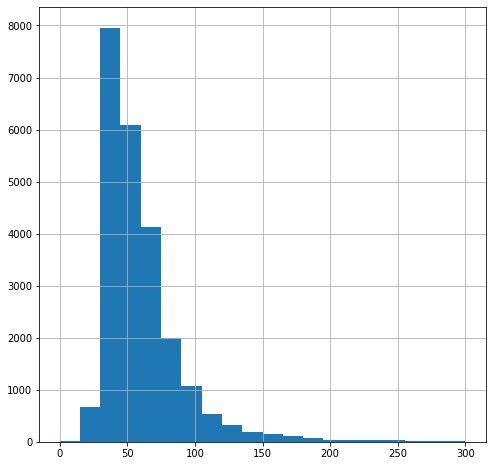

In [26]:
print(new_data['total_area'].hist(range = (0, 300), figsize = (8, 8), bins = 20))
print(new_data['total_area'].describe())

Со значениями все в порядке, есть единичные значения в диапазоне от 210 до 300. Создадим диаграмму размаха для более подробного анализа на содержащиеся значения.

<AxesSubplot:>

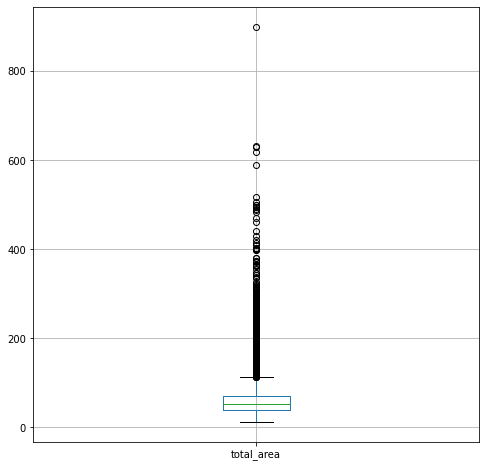

In [27]:
new_data.boxplot(column = ['total_area'], figsize = (8, 8))

На диаграмме видно, что значения больше 100 - выбросы. Сделаем срез значений до 300, т.к. дальше выбросы более редкие и не сильно повлияют на дальнейший анализ.

In [28]:
total_query = new_data.query('total_area > 300')
total_query['total_area'].count()

61

##### Изучение жилой площади

AxesSubplot(0.125,0.125;0.775x0.755)
count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


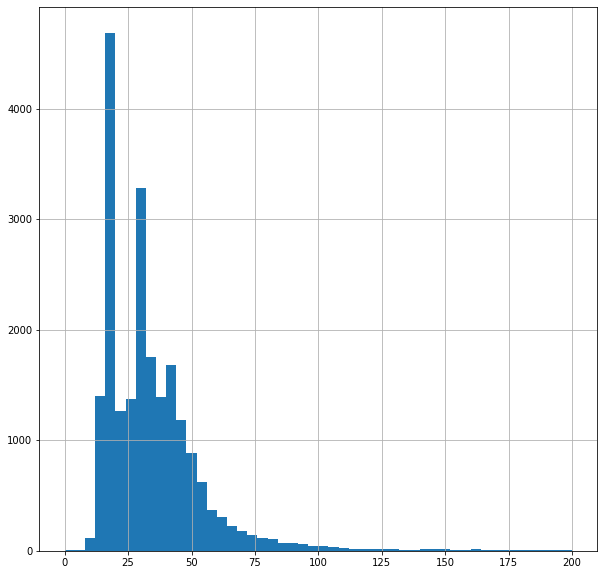

In [29]:
print(new_data['living_area'].hist(range = (0, 200), figsize = (10, 10), bins = 50))
print(new_data['living_area'].describe())

Минимальная жилая площадь выглядит странно, возможно допущена ошибка при внесении данных, т.к. минимальная жилая площадь на одного человека составляет 18 м.кв. Посмотрим сколько всего таких значений

In [30]:
min_living_area = new_data.query('living_area < 10')
min_living_area['living_area'].count()

25

<AxesSubplot:>

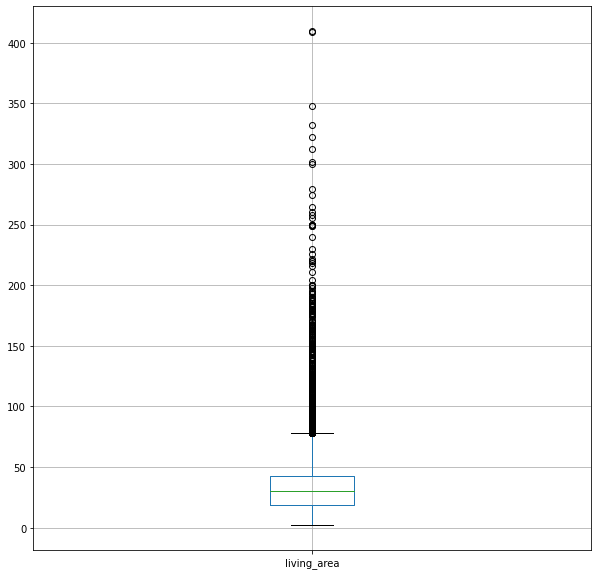

In [31]:
new_data.boxplot(column = ['living_area'], figsize = (10, 10))

Также сделаем срез данных, убрав слишком малые значения до 18 м.кв. и значения после 175 - редкие выбросы.

In [32]:
max_living_area = new_data.query('living_area > 175')
max_living_area['living_area'].count()

65

##### Изучение площади кухни

AxesSubplot(0.125,0.125;0.775x0.755)
count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


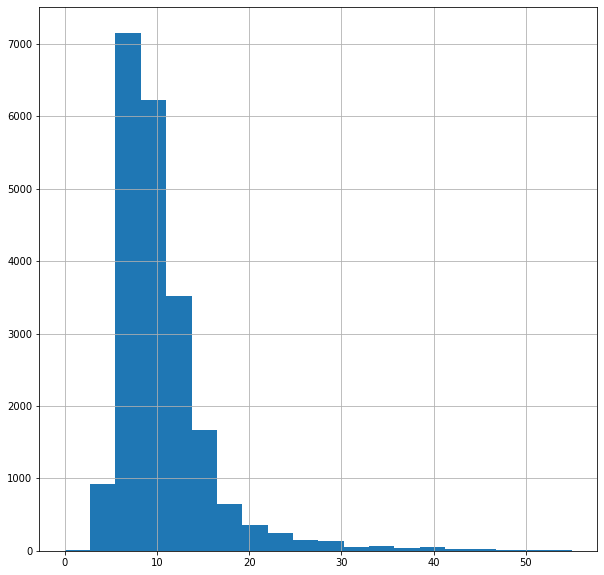

In [33]:
print(new_data['kitchen_area'].hist(range = (0, 55), figsize = (10, 10), bins = 20))
print(new_data['kitchen_area'].describe())

Можно сказать, что с данными все впорядке, но опять смущает минимальное значение в 1.3 кв.м, когда согласно СНиП минимум 5 кв.м. Проверим на выбросы.

<AxesSubplot:>

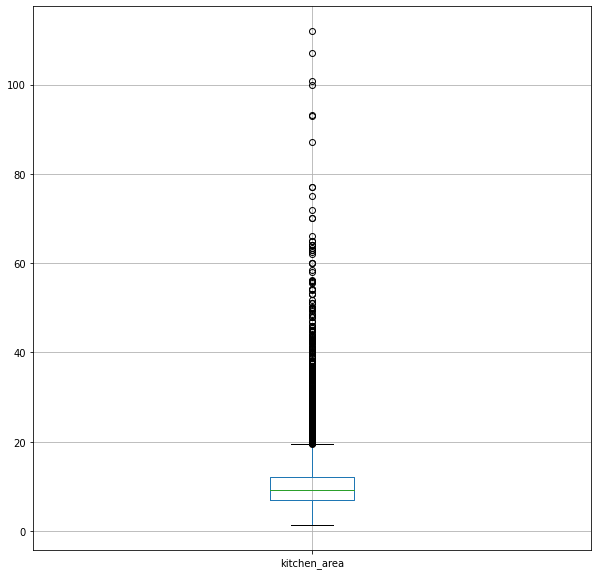

In [34]:
new_data.boxplot(column = ['kitchen_area'], figsize = (10,10))

In [35]:
kitchen_query = new_data.query('kitchen_area > 45')
kitchen_query['kitchen_area'].count()

72

##### Изучение цены обьекта

AxesSubplot(0.125,0.125;0.775x0.755)
count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


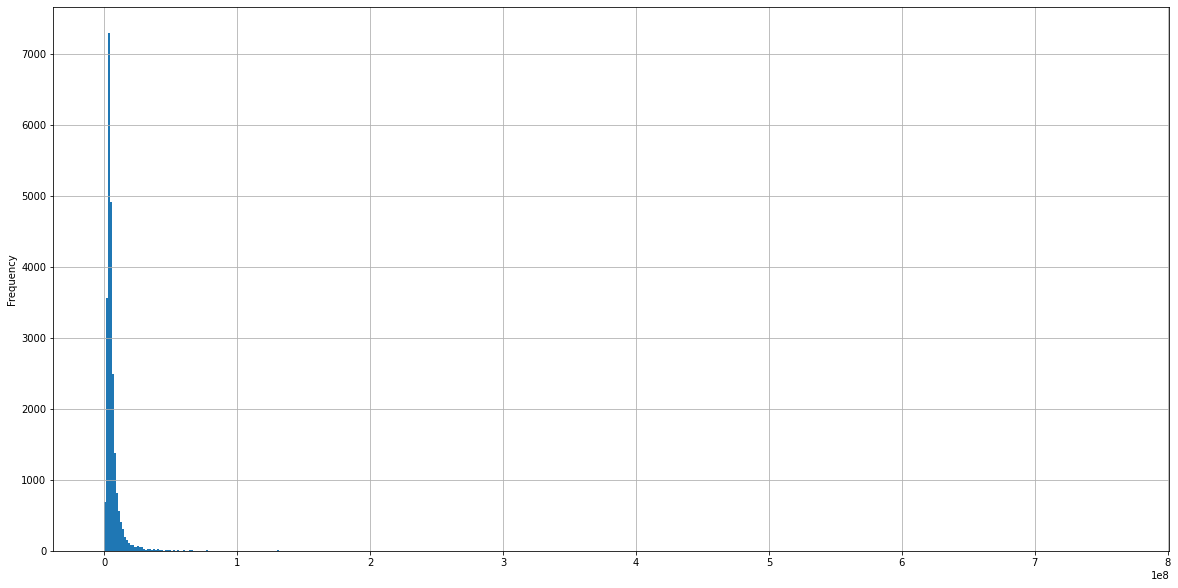

In [36]:
print(new_data['last_price'].plot(kind = 'hist' ,figsize = (20, 10), bins = 500, grid = True))
print(new_data['last_price'].describe())

С данными все впорядке.

##### Изучение количества комнат

AxesSubplot(0.125,0.125;0.775x0.755)
count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


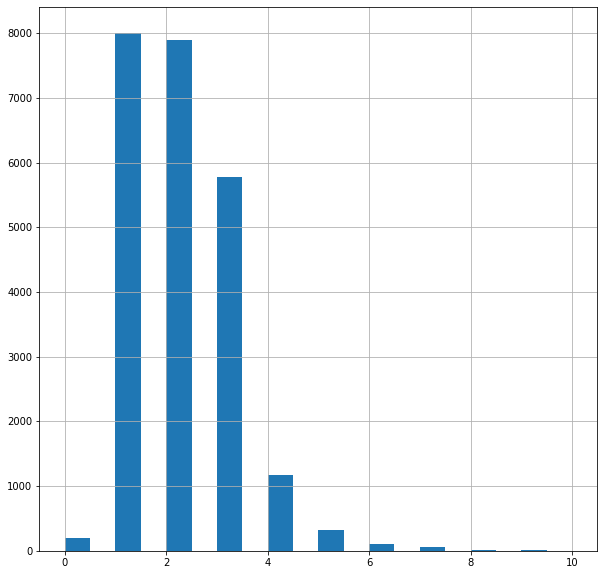

In [37]:
print(new_data['rooms'].hist(range = (0, 10), figsize = (10, 10), bins = 20))
print(new_data['rooms'].describe())

С данными почти все впорядке: минимальное количество комнат 0 может быть у студий, а максимальное в 14 комнат - возможно это двухуровневая квартира, которая специально подверглась перепланировке, чтобы там смогло жить больше людей. Однако на графике почти нет значений после 8 - значит квартир, где больше 8 комнат единицы и можно их смело удалять.

##### Изучение высоты потолков

AxesSubplot(0.125,0.125;0.775x0.755)
count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


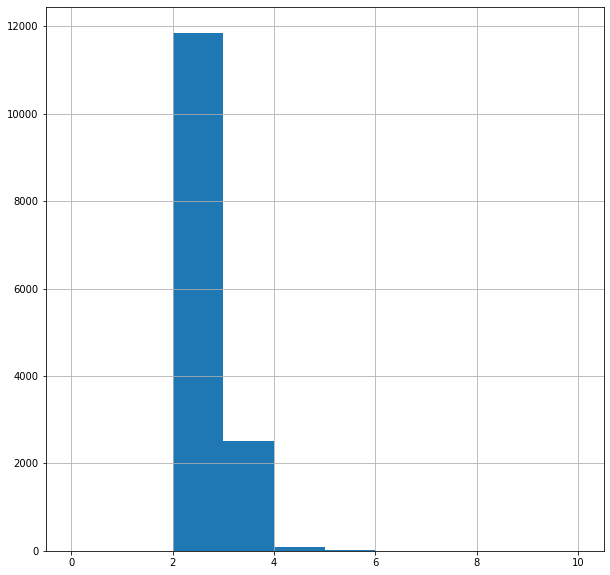

In [38]:
print(new_data['ceiling_height'].hist(range = (0, 10), figsize = (10, 10)))
print(new_data['ceiling_height'].describe())

На графике очень много значений от 1 до 4,2, посмотрим описание столбца и выведем список уникальных значений

In [39]:
new_data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В списке присутствуют аномальные значения - от 1 до 2,5(минимально допустимый по правилам СНиП), как и слишком большие - от 14 до 32. Во втором случае возможно просто не разделили значения запятой, поэтому значения такие громоздкие.

In [40]:
new_data.loc[new_data['ceiling_height'] >= 10, 'ceiling_height'] = new_data['ceiling_height']/10
new_data['ceiling_height'].sort_values().unique()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


array([ 1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,
        2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,
        2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,
        2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,
        2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,
        2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,
        2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,
        2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,

С большими значениями разобрались, построим график и диаграмму разброса для наглядного анализа.

<AxesSubplot:>

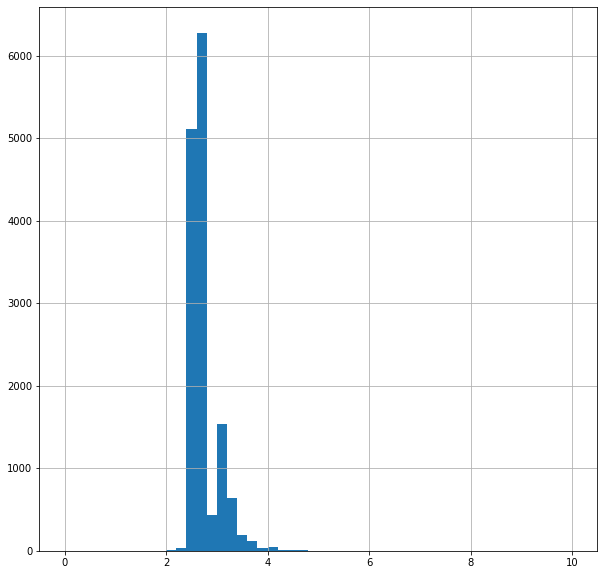

In [41]:
new_data['ceiling_height'].hist(range = (0, 10), figsize = (10, 10), bins = 50)

AxesSubplot(0.125,0.125;0.775x0.755)


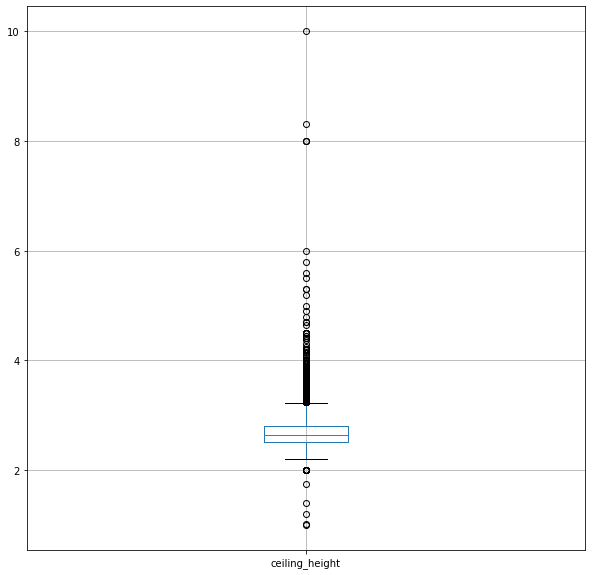

In [42]:
print(new_data.boxplot(column = 'ceiling_height', figsize = (10, 10)))

Сделаем срез от 2,5 до 4,8, т.к. числа с большим значением встречаются редко.

##### Изучение типа этажа квартиры

AxesSubplot(0.125,0.125;0.775x0.755)
count      23565
unique         3
top       другой
freq       17326
Name: category_floor, dtype: object


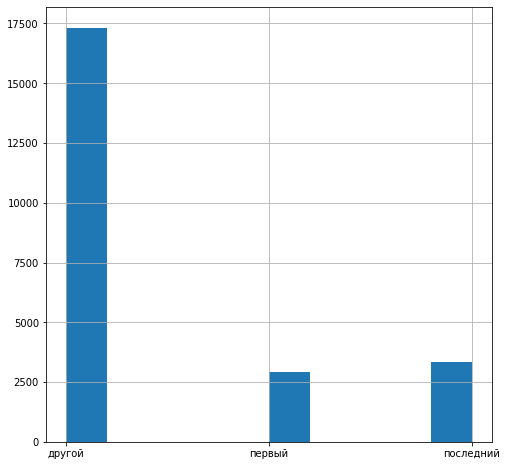

In [43]:
print(new_data['category_floor'].hist(figsize = (8, 8)))
print(new_data['category_floor'].describe())

С данными все впорядке, большинство квартир находятся на промежуточных этажах, меньше всего продают на первом.

##### Изучение общего количества этажей в доме

AxesSubplot(0.125,0.125;0.775x0.755)
count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


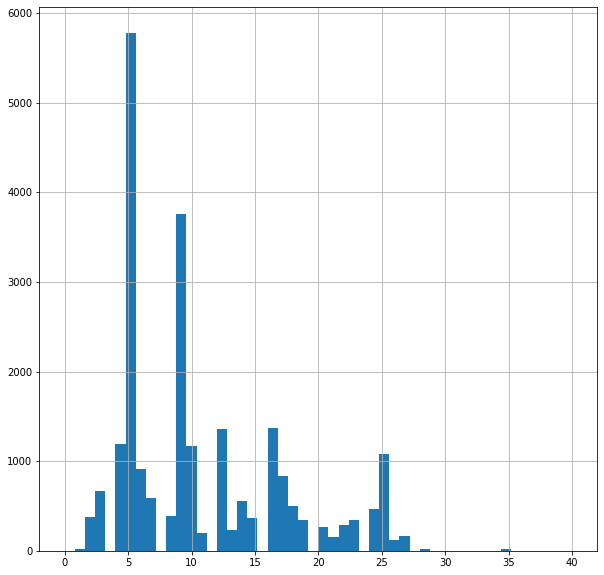

In [44]:
print(new_data['floors_total'].hist(figsize = (10, 10), bins = 50, range =(0, 40)))
print(new_data['floors_total'].describe())

Больше всего обьявлений с квартирами на 5 этажах, с минимальным значением можно согласиться, т.к. есть одноэтажные дома, но на графике также показано некоторое количество значений в промежутке от 28 - скорее всего единичные обьявления, но лучше построить диаграмму размаха для большей наглядности.

<AxesSubplot:>

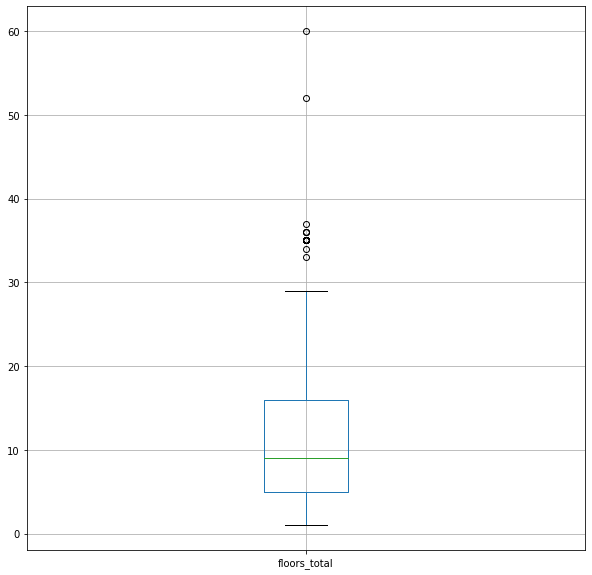

In [45]:
new_data.boxplot(column = 'floors_total', figsize = (10, 10))

Выбросов по сравнению с остальными графиками мало. Можно удалить значения после 30.

##### Изучение расстояния до центра города в метрах

AxesSubplot(0.125,0.125;0.775x0.755)
count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centres_nearest, dtype: float64


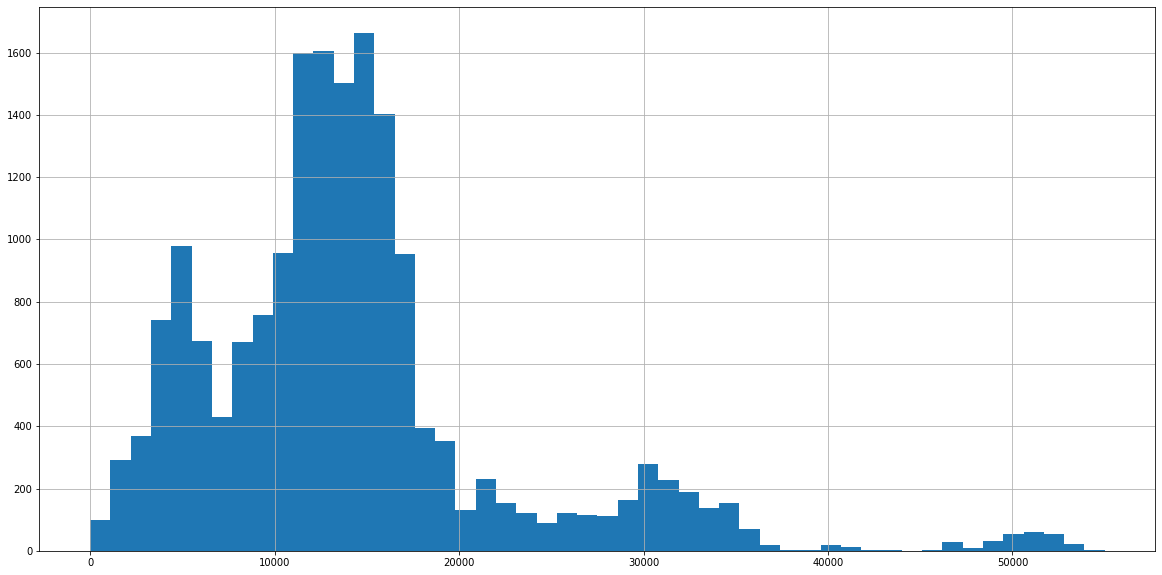

In [46]:
print(new_data['city_centres_nearest'].hist(figsize = (20, 10), bins = 50, range = (0, 55000)))
print(new_data['city_centres_nearest'].describe())

Большинство квартир находятся относительно близко к центру, наблюдаются единичные случаи, когда среднее расстояние до центра превышает отметку в 55 км, или находятся в диапазоне от 38 до 44 км.

<AxesSubplot:>

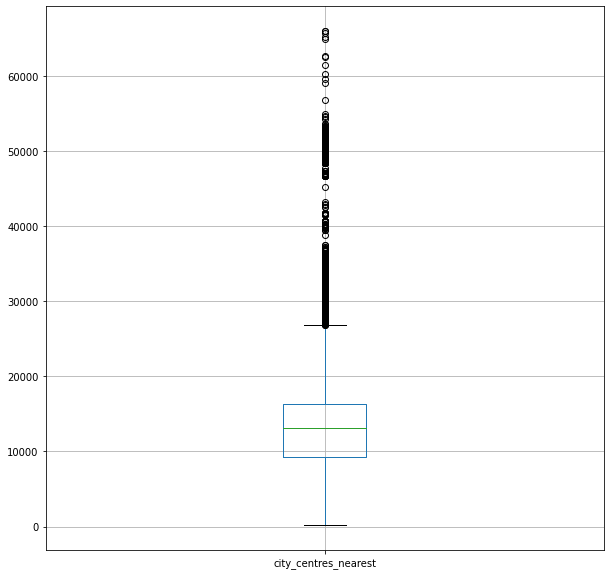

In [47]:
new_data.boxplot(column = 'city_centres_nearest', figsize = (10, 10))

In [48]:
middle_floor = new_data.query('38000 < city_centres_nearest')
middle_floor['city_centres_nearest'].count()

311

##### Изучение расстояния до ближайшего парка

AxesSubplot(0.125,0.125;0.775x0.755)
count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


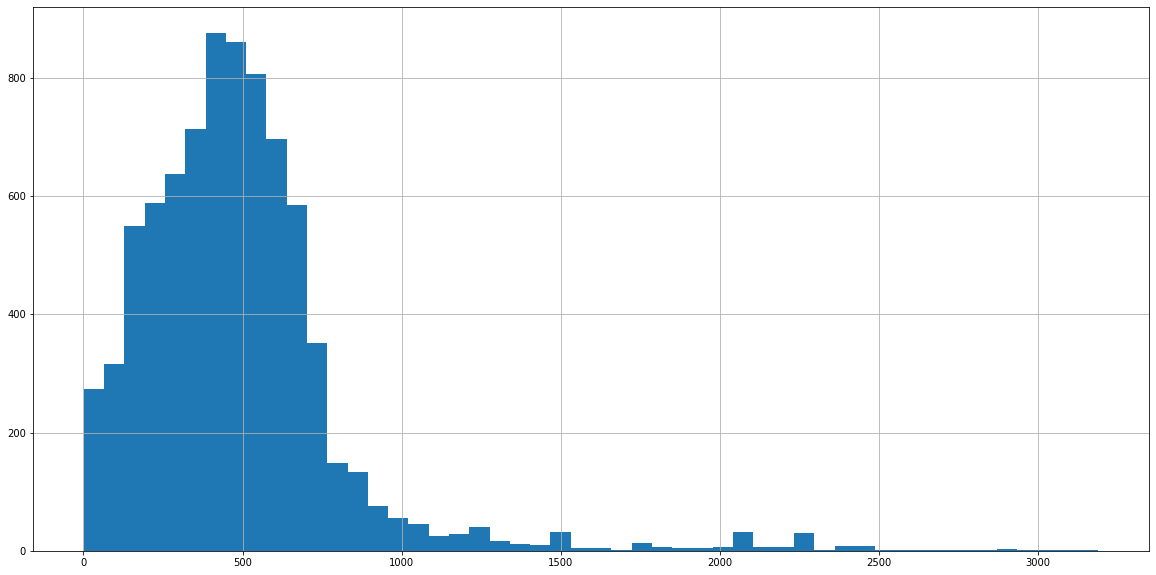

In [49]:
print(new_data['parks_nearest'].hist(figsize = (20, 10), bins = 50))
print(new_data['parks_nearest'].describe())

Проверим количество значений после 1300, т.к. после этого числа идет спад в графике.

<AxesSubplot:>

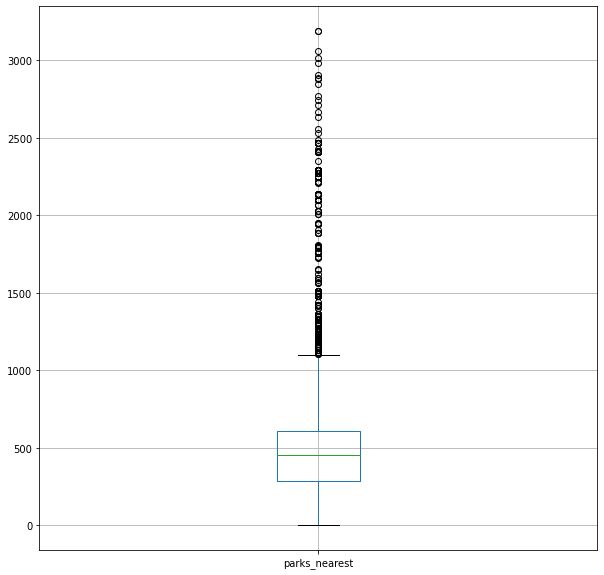

In [50]:
new_data.boxplot(column = ['parks_nearest'], figsize = (10, 10))

### Удаление лишних значений

Срезы сделаем в следующих параметрах
- общая площадь - уберем выбросы до 300
- жилая площадь - уберем выбросы до 10 кв.м, т.к. до количество значений до 18 много, что может повлиять на дальнейший анализ
- площадь кухни - сделаем срез от минимально допустимых значений(5 кв.м) до 45
- количество комнат - уберем значения после 8
- всего этажей в доме - удалим значения после 28

In [51]:
print('Количество строк до', new_data.shape[0])

#срез общей площади
data_query = new_data.query('total_area <= 300')

#Заменим пропуски в living_area на медиану
data_query['living_area'] = data_query['living_area'].fillna(data_query['living_area'].median())
#срез общей площади
data_query = data_query.query('18 <= living_area <= 175')

#Заменим пропуски в kitchen_area на среднее значение, потому как нет сильного разброса значений
data_query['kitchen_area'] = data_query['kitchen_area'].fillna(data_query['kitchen_area'].mean())
#срез площади кухни
data_kitchen_query = data_query.query('5 <= kitchen_area <= 45')

#срез количества комнат
data_query = data_query.query('rooms <= 8')

#срез количества этажей
data_query = data_query.query('floors_total <= 25')

print('Количество строк после', data_query.shape[0])

Количество строк до 23565
Количество строк после 19181


/tmp/ipykernel_127/4222847208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_query['living_area'] = data_query['living_area'].fillna(data_query['living_area'].median())


### Проверка скорости продажи квартир

AxesSubplot(0.125,0.125;0.775x0.755)
count    19181.000000
mean       157.525051
std        216.457256
min          0.000000
25%         21.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


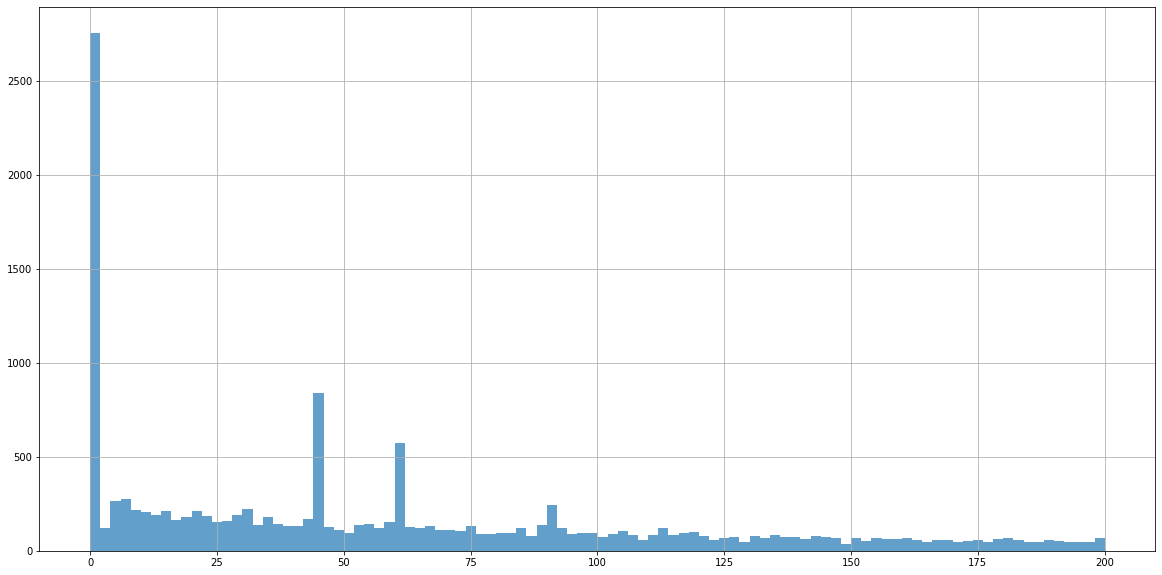

In [52]:
print(data_query['days_exposition'].hist(figsize = (20, 10), bins = 100, range = (0, 200), alpha = 0.7))
print(data_query['days_exposition'].describe())

(-1.0, 500.0)

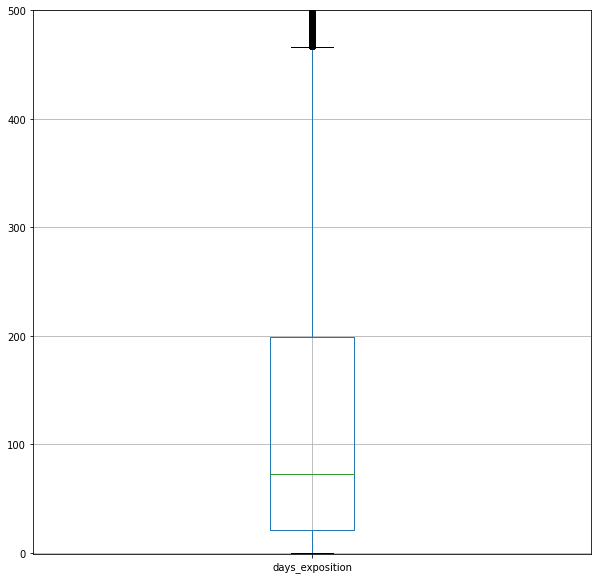

In [53]:
data_query.boxplot(column = ['days_exposition'], figsize = (10, 10))
plt.ylim(-1, 500)

После заполнения пропусков нулями данные несколько искажены, поэтому уберем эти строки и значения после третьего квартиля 450.

AxesSubplot(0.125,0.125;0.775x0.755)
count    14688.000000
mean       121.212418
std        109.910431
min          1.000000
25%         42.000000
50%         83.000000
75%        175.000000
max        450.000000
Name: days_exposition, dtype: float64


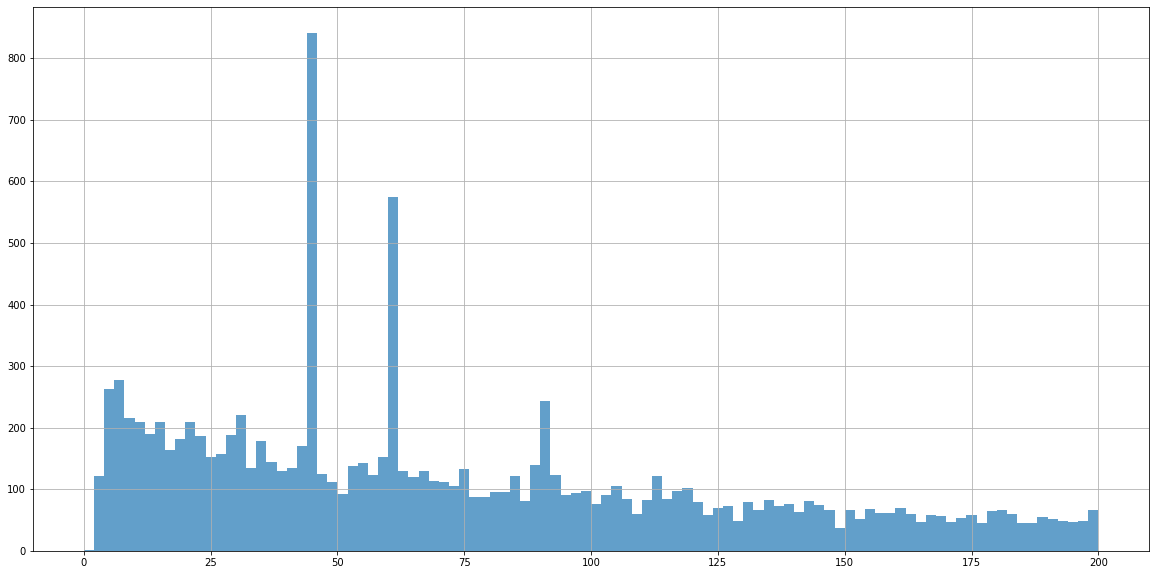

In [54]:
day_exposition = data_query.query('0 < days_exposition <= 450')
print(day_exposition['days_exposition'].hist(figsize = (20, 10), bins = 100, range = (0, 200), alpha = 0.7))
print(day_exposition['days_exposition'].describe())

Посчитаем среднее и медиану, а также выведем список с наибольшим числом значений.

In [55]:
print('Среднее время продажи квартир {:.0f} дней'.format(day_exposition['days_exposition'].mean()))
print('Медианное время продажи квартир {:.0f} дней'.format(day_exposition['days_exposition'].median()))

Среднее время продажи квартир 121 дней
Медианное время продажи квартир 83 дней


In [56]:
day_exposition['days_exposition'].sort_values().value_counts().head()

45    724
60    494
90    186
7     182
30    168
Name: days_exposition, dtype: int64

Среднее время продажи квартир занимает 121 день - почти 4 месяца. Нельзя принимать этот результат за верный, т.к. многие обьявления висят на сайте довольно продолжительное время, если не учитывать срез данных до 450 дней - самое большой срок 4 года. 

Если учитывать список, то чаще всего квартиры продаются на 45, 60, 90, 7 и 30 день, но скорее всего просто происходит сброс сроков.

### Изучение факторов, влияющих на общую цену обьекта

Изучми, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Text(0.5, 0, 'Общая площадь')

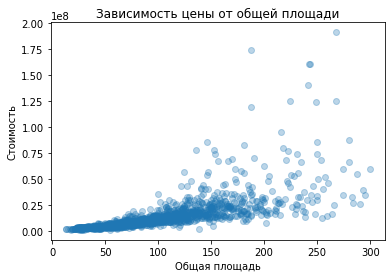

In [57]:
total_area_pivot = data_query.pivot_table(index ='total_area', values = 'last_price', aggfunc = 'mean')
plt.scatter(
    x = total_area_pivot.index,
    y = total_area_pivot['last_price'],
    alpha = 0.3
)
plt.title('Зависимость цены от общей площади')
plt.ylabel('Стоимость')
plt.xlabel('Общая площадь')

In [58]:
print(round(data_query['last_price'].corr(data_query['total_area']), 2))

0.67


Рассматривая график и положительное значение корреляции можно заметить, что зависимость имеется, хоть и есть небольшой разброс значений после 200 м.кв.

Text(0.5, 0, 'Жилая площадь')

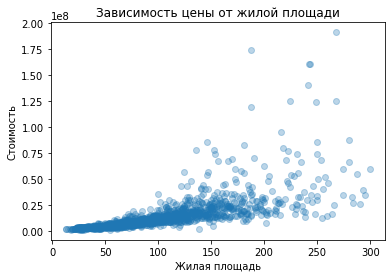

In [59]:
living_area_pivot = data_query.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'mean')
plt.scatter(
    x = total_area_pivot.index,
    y = total_area_pivot['last_price'],
    alpha = 0.3
)
plt.title('Зависимость цены от жилой площади')
plt.ylabel('Стоимость')
plt.xlabel('Жилая площадь')

In [60]:
print(round(data_query['last_price'].corr(data_query['living_area']), 2))

0.54


Также прослеживается зависимость цены от площади кухни.

Text(0.5, 0, 'Площадь кухни')

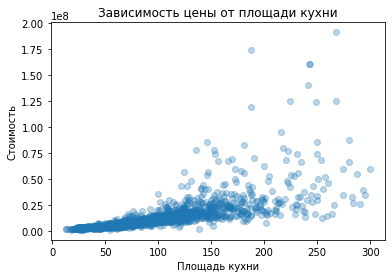

In [61]:
kitchen_area_pivot = data_query.pivot_table(index='kitchen_area', values = 'last_price', aggfunc = 'mean')
plt.scatter(
    x = total_area_pivot.index,
    y = total_area_pivot['last_price'],
    alpha = 0.3
)
plt.title('Зависимость цены от площади кухни')
plt.ylabel('Стоимость')
plt.xlabel('Площадь кухни')

In [62]:
print(round(data_query['last_price'].corr(data_query['kitchen_area']), 2))

0.51


Здесь ситуация почти такая же, как в предыдущих случаях.

Text(0.5, 0, 'Количество комнат')

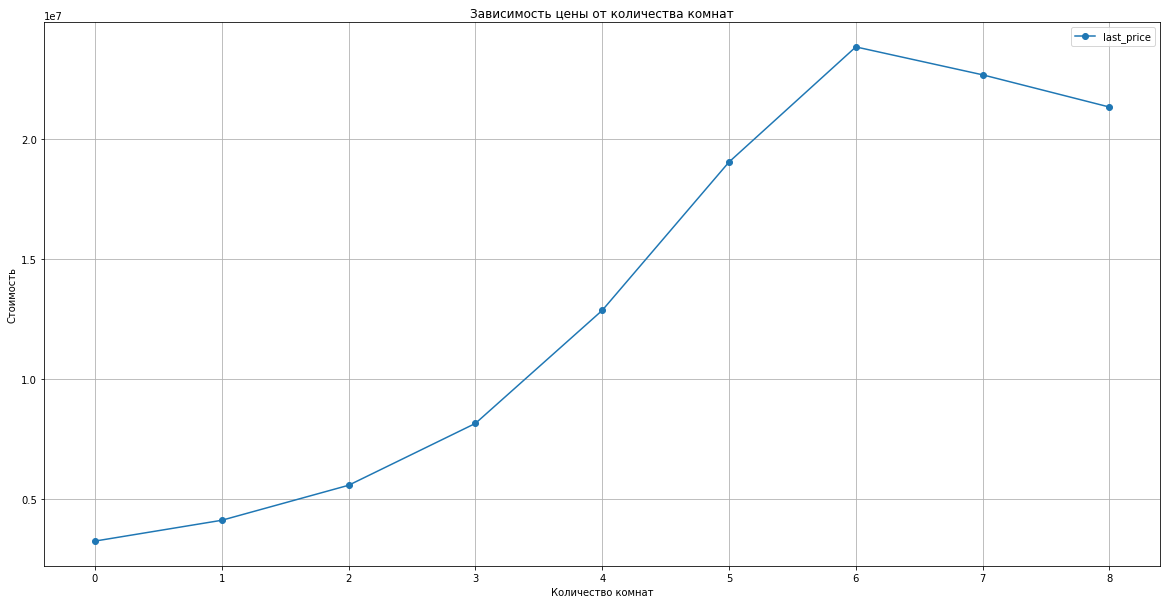

In [63]:
rooms_pivot = data_query.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').plot(
    style='o-', 
    grid=True, 
    figsize = (20, 10),
)
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Стоимость')
plt.xlabel('Количество комнат')

На этом графике уже видна прямая зависимость цены от количества комнат, но после 6 идет плавный спад цены.  

Text(0.5, 0, 'Этаж')

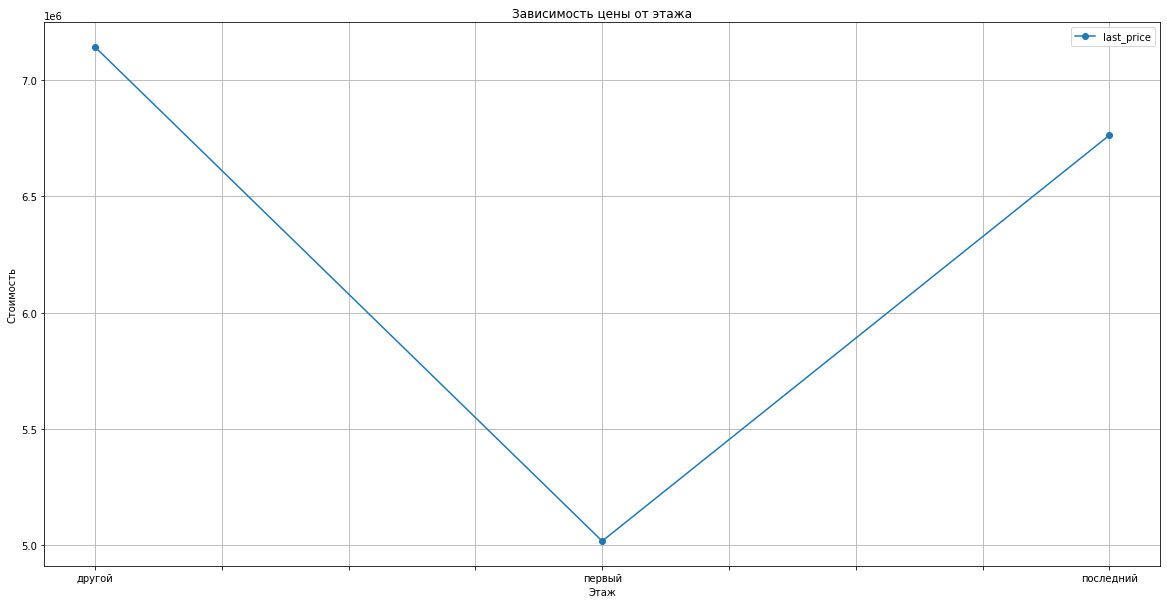

In [64]:
floors_pivot = data_query.pivot_table(index = 'category_floor', values = 'last_price', aggfunc = 'mean').plot(
    style='o-', 
    grid=True, 
    figsize = (20, 10),
)
plt.title('Зависимость цены от этажа')
plt.ylabel('Стоимость')
plt.xlabel('Этаж')

Самую высокую цену имеют квартиры на промежуточных этажах, на первые этажи назначена самая низкая цена. В данном случае играет роль количество значений в каждой категории.

Text(0.5, 0, 'День недели')

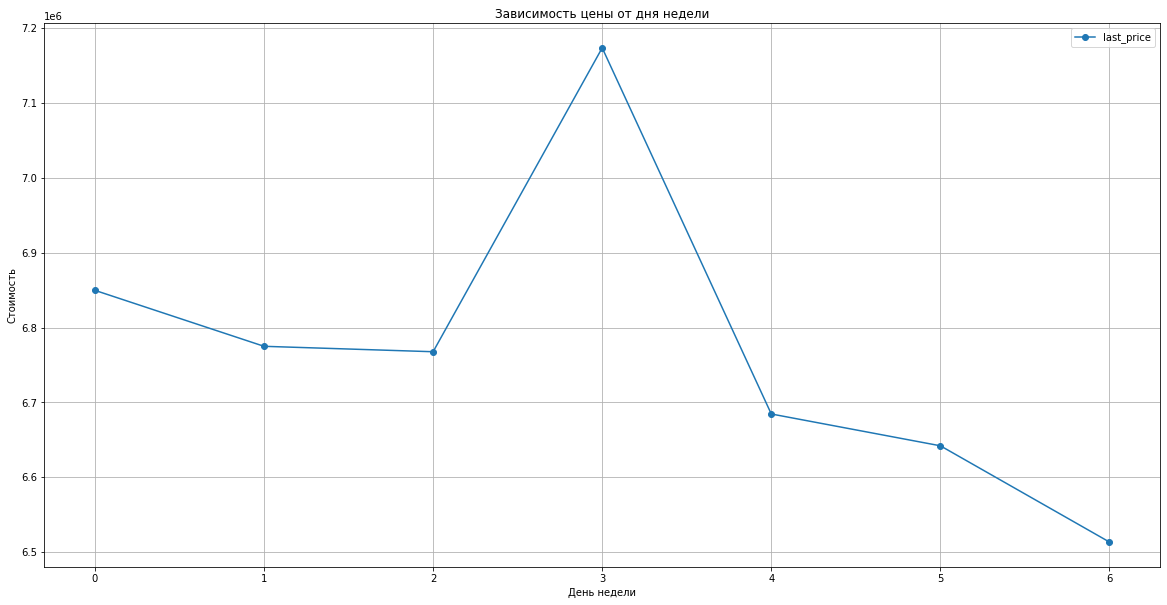

In [65]:
week_day_pivot = data_query.pivot_table(index = 'week_day', values = 'last_price', aggfunc = 'mean').plot(
    style='o-', 
    grid=True, 
    figsize = (20, 10),
)
plt.title('Зависимость цены от дня недели')
plt.ylabel('Стоимость')
plt.xlabel('День недели')

Можно сказать, что в основном самые высокие цены на квартиры имеют обьявления, опубликованные в понедельник и четверг, после пятницы идет спад, а вторник и среда имеют почти равные значения.

Text(0.5, 0, 'Месяц')

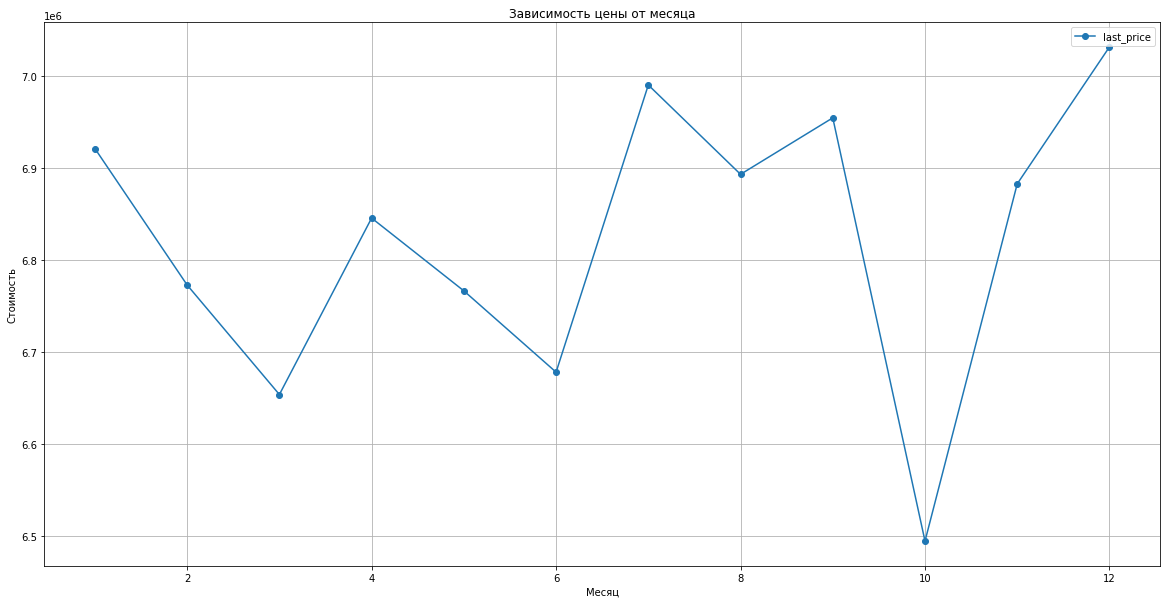

In [66]:
month_pivot = data_query.pivot_table(index = 'month', values = 'last_price', aggfunc = 'mean').plot(
    style='o-', 
    grid=True, 
    figsize = (20, 10),
)
plt.title('Зависимость цены от месяца')
plt.ylabel('Стоимость')
plt.xlabel('Месяц')

Самые дорогие обявления выставлялись в предновогодний период и летом, также пик цен наблюдается в апреле, потому как данные периоды считаются самыми удачными для продажи квартир. Тут видна прямая зависимость цены от месяца.

Text(0.5, 0, 'Год')

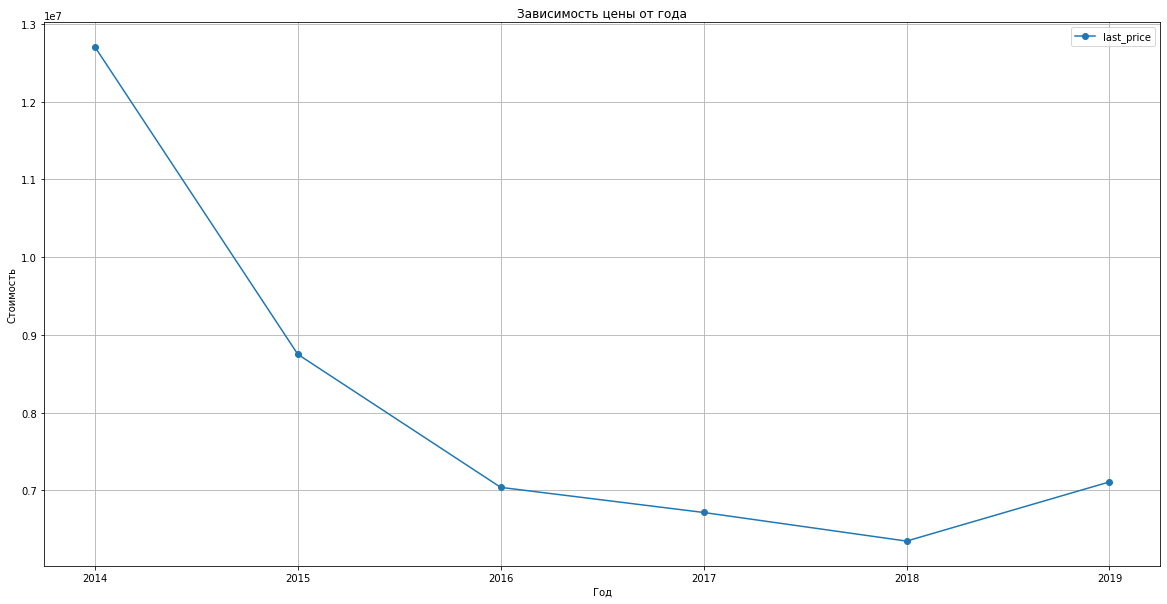

In [67]:
year_pivot = data_query.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean').plot(
    style='o-', 
    grid=True, 
    figsize = (20, 10),
)
plt.title('Зависимость цены от года')
plt.ylabel('Стоимость')
plt.xlabel('Год')

In [68]:
corr_query = data_query[['last_price', 'year', 'total_area']]
corr_query.corr()

,last_price,year,total_area
last_price,1.000000,-0.052554,0.674016
year,-0.052554,1.000000,-0.097487
total_area,0.674016,-0.097487,1.000000


С 2014 года идет плавный спад цен на квартры - это связан со снижением себестоимости строительства, кризисом и другими событиями, произошедшими за тот год, а также по данным корреляции уменьшилась и площадь продаваемых квартир.

### Средняя цена в 10 населенных пунктах 

**Цель:** Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [69]:
max_price = data_query.pivot_table(index = 'locality_name', values = 'price_square_m', aggfunc = 'mean')
max_price['price_square_m'] = round(max_price['price_square_m'], 2)
print('\033[1m' + 'Населенные пункты с самой высокой стоимостью кв. метра \n' + '\033[0m', 
      max_price.sort_values(by = 'price_square_m', ascending = False).head(10))
print()
print('\033[1m'+'Населенные пункты с самой низкой стоимостью кв. метра \n'+'\033[0m', 
      max_price.sort_values(by = 'price_square_m').head(10))

Населенные пункты с самой высокой стоимостью кв. метра 
                    price_square_m
locality_name                    
Зеленогорск             119762.29
Санкт-Петербург         113996.06
поселок Репино          104238.61
Пушкин                  103005.28
деревня Мистолово       100893.63
Сестрорецк              100882.35
поселок Лисий Нос       100660.82
Кудрово                  98219.02
поселок Левашово         96997.69
деревня Кудрово          90464.13

Населенные пункты с самой низкой стоимостью кв. метра 
                          price_square_m
locality_name                          
деревня Старополье             11206.22
поселок станции Свирь          11481.48
деревня Вахнова Кара           11688.31
деревня Выскатка               12335.48
поселок Совхозный              12629.13
деревня Малая Романовка        12724.55
поселок Тесово-4               12931.03
деревня Фалилеево              13303.77
деревня Сижно                  13709.68
поселок Житково                14956.2

### Стоимость квартир в Санкт-Петербурге

**Цель:** вычислить их среднюю стоимость на разном удалении от центра. Построить график изменения средней цены для каждого километра от центра Петербурга.

Text(0.5, 0, 'Расстояние в метрах')

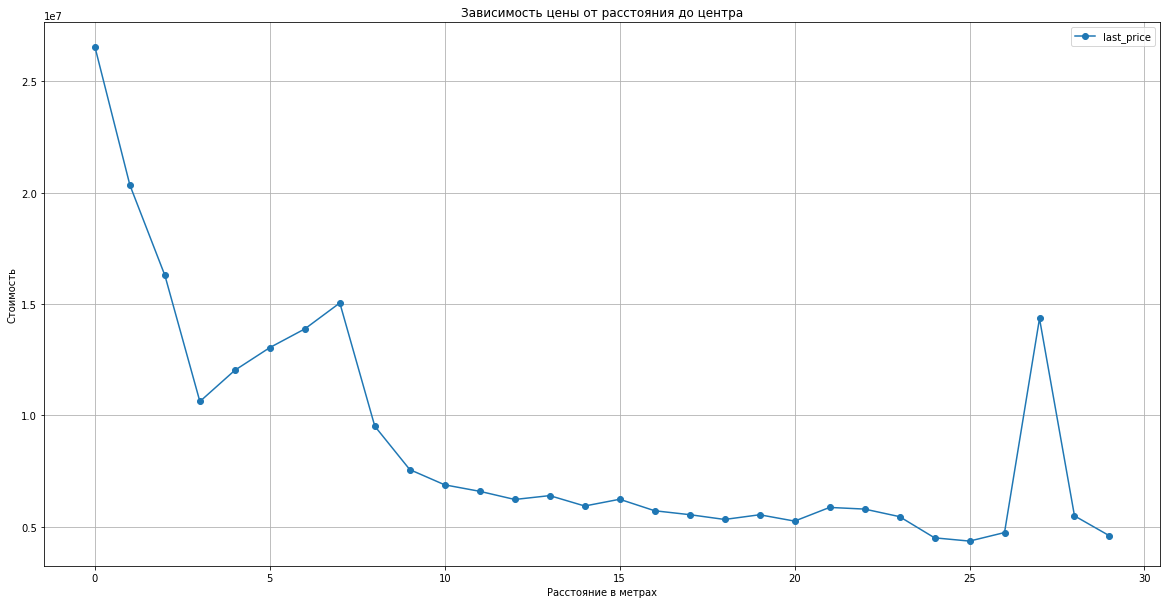

In [70]:
data_stb = data_query[data_query['locality_name'] == 'Санкт-Петербург']
stb_pivot = data_stb.pivot_table(index = 'city_centres_nearest_km', values = 'last_price', aggfunc = 'mean')
stb_pivot.plot(
    style='o-', 
    grid=True, 
    figsize = (20, 10),
)
plt.title('Зависимость цены от расстояния до центра')
plt.ylabel('Стоимость')
plt.xlabel('Расстояние в метрах')

Цена напрямую зависит от расстояния. Самую большую стоимость имеют квартиры в центре, в 7 км и 27. Не смторя на спад от 0 до 5 км, недвижимость в этом радиусе имеют большую цену, чем в диапазоне от 8 км. Посмотрим с чем связан пик на 27 км.

In [71]:
price = data_stb.query('city_centres_nearest_km == 27')
price

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centres_nearest,parks_nearest,days_exposition,price_square_m,week_day,month,year,category_floor,city_centres_nearest_km
744,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,25.0,Санкт-Петербург,27313.0,1496.0,128,193918.92,1,11,2017,другой,27.0


Обьявление размещено в декабре, кухня имеет большую площадь и расположена на 3 этаже, что может обьяснить такую высокую цену, но смотря на остальные параметры можно сказать, что цена завышена, т.к. жилая площадь имеет стандартный размер, всего 2 комнаты и квартира расположена далеко от центра.

## Общий вывод

В ходе исследования данных о продаже квартир были выявлены некоторые аномалии, заполнены пропуски и изменены типы данных там, где это требовалось и было возможно.
Самыми проблематичными столбцами, использованными при анализе были:

- kitchen_area, living_area - аномально малые значения в площади
- city_centres_nearest, parks_nearest - много пропущенных значений
- ceiling_height - слишком большие значения для потолков 

На стоимость квартир напрямую влияют следующие факторы:
- Расстояние до центра
- День и месяц размещения обьявлений
- Этаж
- Количество комнат
- Жилая и кухонная площадь 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод